# Reece Battrum

## Does the implementation of new 

How long does it take the Boston Police Department to enact a noticable change that affects the crime rate in locations around Boston with large amount of criminal activity.

How much does a new police procedure / protocol affect the crime rate?

Is a large decrease in crime during a certain time period or area noticable in this data set?
_________________

Is there a correlation between the implementation of laws and the effect dec crime rate, positive or negative effect, any affect at all? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("../data/raw/crime.csv", encoding = 'unicode_escape')

In [3]:
print("Number of rows and columns respectively:", df1.shape)
print("Columns in the dataset:", df1.columns)

Number of rows and columns respectively: (319073, 17)
Columns in the dataset: Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')


In [4]:
df1.describe(include='object').T

,count,unique,top,freq
INCIDENT_NUMBER,319073,282517,I162030584,13
OFFENSE_CODE_GROUP,319073,67,Motor Vehicle Accident Response,37132
OFFENSE_DESCRIPTION,319073,244,SICK/INJURED/MEDICAL - PERSON,18783
DISTRICT,317308,12,B2,49945
REPORTING_AREA,319073,879,,20250
SHOOTING,1019,1,Y,1019
OCCURRED_ON_DATE,319073,233229,2017-06-01 00:00:00,29
DAY_OF_WEEK,319073,7,Friday,48495
UCR_PART,318983,4,Part Three,158553
STREET,308202,4657,WASHINGTON ST,14194


In [17]:
dfClean = df1.drop(columns = ['INCIDENT_NUMBER', 'REPORTING_AREA', 'SHOOTING', 'DAY_OF_WEEK', 'UCR_PART', 'Location', 'OFFENSE_DESCRIPTION', 'Lat', 'Long', 'HOUR', 'OCCURRED_ON_DATE', 'OFFENSE_CODE'])
dfClean

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,STREET
0,Larceny,D14,2018,9,LINCOLN ST
1,Vandalism,C11,2018,8,HECLA ST
2,Towed,D4,2018,9,CAZENOVE ST
3,Investigate Property,D4,2018,9,NEWCOMB ST
4,Investigate Property,B3,2018,9,DELHI ST
...,...,...,...,...,...
319068,Warrant Arrests,D4,2016,6,COVENTRY ST
319069,Homicide,E18,2015,7,RIVER ST
319070,Warrant Arrests,E18,2015,7,RIVER ST
319071,Warrant Arrests,E13,2016,5,NEW WASHINGTON ST


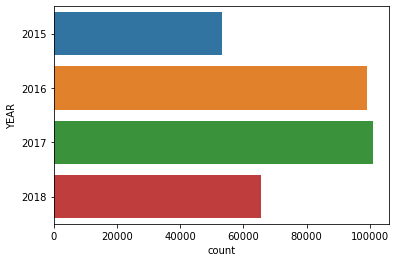

In [34]:
countVsYear = sns.countplot(y ='YEAR' ,data = dfClean)
# Number of crimes committed total by year
#Shows very large decrease in crime from 2017 -> 2018

In [36]:
dfClean2015 = dfClean[dfClean['YEAR'] == 2015]
numCrime2015 = dfClean2015.dropna().shape[0]
print('The number of crimes committed in Boston in 2015 is', numCrime2015)
dfClean2015.dropna()

The number of crimes committed in Boston in 2015 is 52027


,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,STREET
4363,Harassment,B3,2015,7,RADCLIFFE ST
14715,Other,B2,2015,7,FAYSTON ST
16645,Fraud,D4,2015,12,WESTLAND AVE
16646,Larceny,D4,2015,12,WESTLAND AVE
24888,Fraud,E18,2015,7,OAKCREST RD
...,...,...,...,...,...
319064,Drug Violation,A1,2015,8,BOYLSTON ST
319065,Drug Violation,A1,2015,8,BOYLSTON ST
319069,Homicide,E18,2015,7,RIVER ST
319070,Warrant Arrests,E18,2015,7,RIVER ST


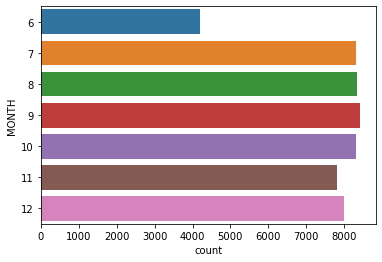

In [44]:
countVsMonth2015 = sns.countplot(y ='MONTH' ,data = dfClean2015)
#Crime by month in 2015, shows crime is increasing as year goes on leading to large jump in 2016
#Note: BPD began using this new system in June.

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT')

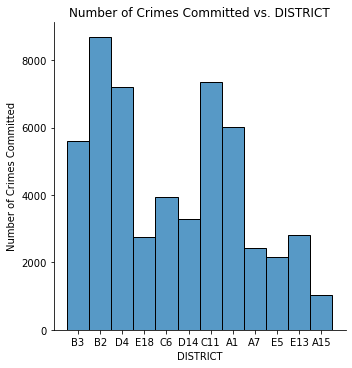

In [13]:
sns.displot(dfClean2015['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT')

In [20]:
dfClean2016 = dfClean[dfClean['YEAR'] == 2016]
numCrime2016 = dfClean2016.dropna().shape[0]
print('The number of crimes committed in Boston in 2016 is', numCrime2016)
dfClean2016.dropna()

The number of crimes committed in Boston in 2016 is 93173


,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,STREET
1813,Fraud,C11,2016,1,HILL TOP ST
3072,Property Lost,E13,2016,7,HATHAWAY ST
7885,Harassment,D4,2016,8,W NEWTON ST
11783,Counterfeiting,E5,2016,9,GARNET RD
12825,Police Service Incidents,B3,2016,10,WARNER ST
...,...,...,...,...,...
319058,Violations,B2,2016,7,SLAYTON WAY
319059,Warrant Arrests,C11,2016,2,GENEVA AVE
319060,Warrant Arrests,C11,2016,2,GENEVA AVE
319068,Warrant Arrests,D4,2016,6,COVENTRY ST


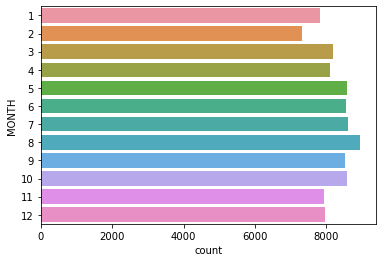

In [39]:
countVsMonth2016 = sns.countplot(y ='MONTH' ,data = dfClean2016)

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT')

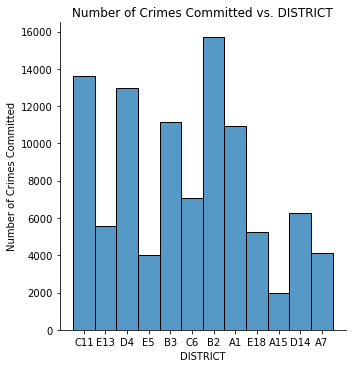

In [12]:
sns.displot(dfClean2016['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT')

In [21]:
dfClean2017 = dfClean[dfClean['YEAR'] == 2017]
numCrime2017 = dfClean2017.dropna().shape[0]
print('The number of crimes committed in Boston in 2017 is', numCrime2017)
dfClean2017.dropna()

The number of crimes committed in Boston in 2017 is 97961


,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,STREET
569,Fraud,D4,2017,11,E BROOKLINE ST
744,Investigate Property,D14,2017,10,KELTON ST
923,Property Lost,B2,2017,8,SHAWMUT AVE
1162,Fraud,D14,2017,6,COMMONWEALTH AVE
1444,Property Lost,B3,2017,12,MORTON ST
...,...,...,...,...,...
318915,Violations,E18,2017,1,AMERICAN LEGION HWY
318927,Warrant Arrests,D14,2017,4,BRIGHTON AVE
319030,Warrant Arrests,B2,2017,1,JOHN ELIOT SQ
319031,Drug Violation,B2,2017,1,JOHN ELIOT SQ


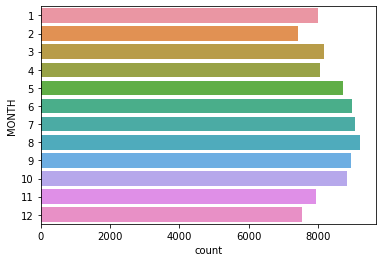

In [42]:
countVsMonth2017 = sns.countplot(y ='MONTH' ,data = dfClean2017)
#Crime by month in 2017, shows decreasing trend heading into 2018

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT')

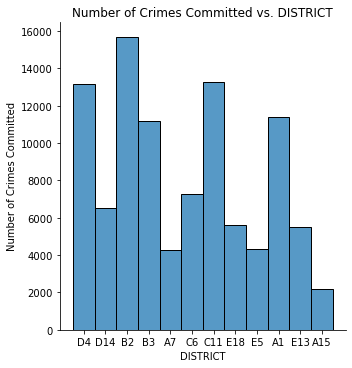

In [79]:
sns.displot(dfClean2017['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT')

In [22]:
dfClean2018 = dfClean[dfClean['YEAR'] == 2018]
numCrime2018 = dfClean2018.dropna().shape[0]
print('The number of crimes committed in Boston in 2018 is', numCrime2018)
dfClean2018.dropna()

The number of crimes committed in Boston in 2018 is 64323


,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,STREET
0,Larceny,D14,2018,9,LINCOLN ST
1,Vandalism,C11,2018,8,HECLA ST
2,Towed,D4,2018,9,CAZENOVE ST
3,Investigate Property,D4,2018,9,NEWCOMB ST
4,Investigate Property,B3,2018,9,DELHI ST
...,...,...,...,...,...
318904,Warrant Arrests,E13,2018,7,HUBBARD ST
318905,Drug Violation,E13,2018,7,HUBBARD ST
319042,Warrant Arrests,A1,2018,8,CAMBRIDGE ST
319066,Drug Violation,E13,2018,1,CENTRE ST


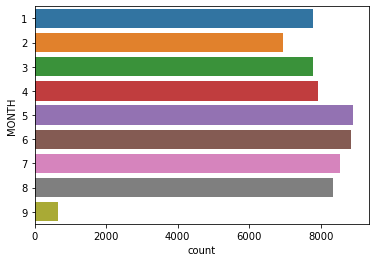

In [43]:
countVsMonth2018 = sns.countplot(y ='MONTH' ,data = dfClean2018)
#Crime by month in 2018 shows the unfortunate increase in crime again heading into the later months of the year.
#Note: the BPD changed systems early in September.

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT')

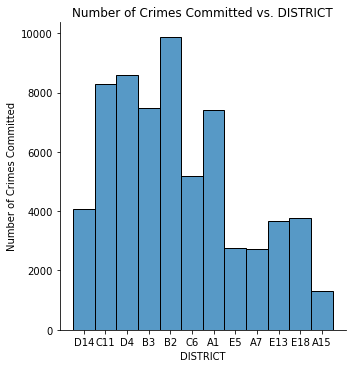

In [81]:
sns.displot(dfClean2018['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT')

In [24]:
dfShoot = df1.drop(columns = ['INCIDENT_NUMBER', 'REPORTING_AREA', 'DAY_OF_WEEK', 'UCR_PART', 'Location', 'OFFENSE_DESCRIPTION', 'Lat', 'Long', 'HOUR', 'OCCURRED_ON_DATE', 'OFFENSE_CODE_GROUP', 'OFFENSE_CODE'])
dfShoot1 = dfShoot.dropna()

In [25]:
dfShoot2015 = dfShoot1[dfShoot1['YEAR'] == 2015]
numShoot2015 = dfShoot2015.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2015 is', numShoot2015)
dfShoot2015

The number of confirmed shootings committed in Boston in 2015 is 179


,DISTRICT,SHOOTING,YEAR,MONTH,STREET
266275,A7,Y,2015,12,DECATUR ST
266280,B3,Y,2015,12,GLEASON ST
266665,B3,Y,2015,12,WILMORE ST
266666,B3,Y,2015,12,WILMORE ST
266667,B3,Y,2015,12,WILMORE ST
...,...,...,...,...,...
317369,B2,Y,2015,6,DUDLEY ST
317370,B2,Y,2015,6,DUDLEY ST
317371,B2,Y,2015,6,DUDLEY ST
317567,B2,Y,2015,6,KERR WAY


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT')

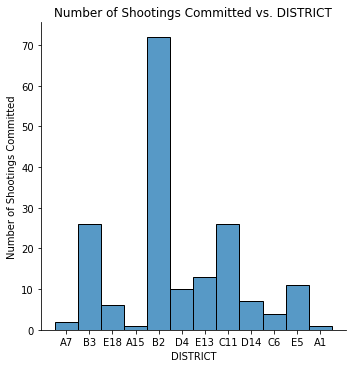

In [84]:
sns.displot(dfShoot2015['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT')

In [26]:
dfShoot2016 = dfShoot1[dfShoot1['YEAR'] == 2016]
numShoot2016 = dfShoot2016.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2016 is', numShoot2016)
dfShoot2016

The number of confirmed shootings committed in Boston in 2016 is 277


,DISTRICT,SHOOTING,YEAR,MONTH,STREET
167458,C11,Y,2016,12,BOWDOIN ST
167912,C11,Y,2016,12,DRAPER ST
168987,B3,Y,2016,12,GLEASON ST
169272,B3,Y,2016,12,COLONIAL AVE
170542,B3,Y,2016,12,CALLENDER ST
...,...,...,...,...,...
263760,B3,Y,2016,1,BLUE HILL AVE
264131,C11,Y,2016,5,MOUNT BOWDOIN TER
265935,B3,Y,2016,1,BLUE HILL AVE
265936,B3,Y,2016,1,BLUE HILL AVE


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT')

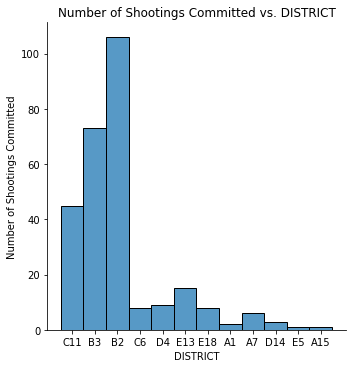

In [86]:
sns.displot(dfShoot2016['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT')

In [27]:
dfShoot2017 = dfShoot1[dfShoot1['YEAR'] == 2017]
numShoot2017 = dfShoot2017.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2017 is', numShoot2017)
dfShoot2017

The number of confirmed shootings committed in Boston in 2017 is 361


,DISTRICT,SHOOTING,YEAR,MONTH,STREET
66499,B2,Y,2017,12,ELDER ST
66880,E18,Y,2017,12,FLORIAN ST
67672,C11,Y,2017,12,BELFORT ST
67699,B3,Y,2017,12,WELLINGTON HILL ST
67700,B3,Y,2017,12,WELLINGTON HILL ST
...,...,...,...,...,...
167108,B3,Y,2017,1,BROWNING AVE
197877,B2,Y,2017,2,WASHINGTON ST
197878,B2,Y,2017,2,WASHINGTON ST
197879,B2,Y,2017,2,WASHINGTON ST


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT')

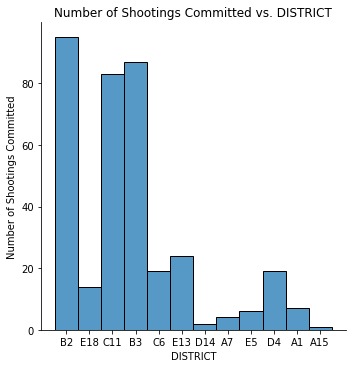

In [88]:
sns.displot(dfShoot2017['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT')

In [28]:
dfShoot2018 = dfShoot1[dfShoot1['YEAR'] == 2018]
numShoot2018 = dfShoot2018.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2018 is', numShoot2018)
dfShoot2018

The number of confirmed shootings committed in Boston in 2018 is 177


,DISTRICT,SHOOTING,YEAR,MONTH,STREET
1295,E18,Y,2018,8,HILLIS RD
1860,B2,Y,2018,8,DUDLEY ST
3259,B2,Y,2018,8,HOLLANDER ST
3260,B2,Y,2018,8,HOLLANDER ST
4107,A15,Y,2018,8,MCNULTY CT
...,...,...,...,...,...
66085,C6,Y,2018,1,B ST
66086,C6,Y,2018,1,B ST
66087,C6,Y,2018,1,B ST
66088,C6,Y,2018,1,B ST


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT')

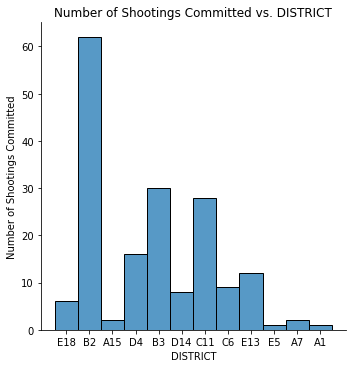

In [90]:
sns.displot(dfShoot2018['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT')